# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [150]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [151]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
df = pd.read_csv('data_clustering_inverse.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TransactionAmount           2108 non-null   float64
 1   TransactionDate             2108 non-null   object 
 2   TransactionType             2108 non-null   int64  
 3   Location                    2108 non-null   object 
 4   Channel                     2108 non-null   int64  
 5   CustomerAge                 2108 non-null   float64
 6   CustomerOccupation          2108 non-null   int64  
 7   TransactionDuration         2108 non-null   float64
 8   LoginAttempts               2108 non-null   float64
 9   AccountBalance              2108 non-null   float64
 10  PreviousTransactionDate     2108 non-null   object 
 11  TransactionAmount_Binned    2108 non-null   int64  
 12  CustomerAge_Binned          2108 non-null   int64  
 13  TransactionDuration_Binned  2108 

In [152]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionDuration_Binned,LoginAttempts_Binned,AccountBalance_Binned,Target
0,14.09,2023-04-11 16:29:14,1,San Diego,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,3,0,3,0,3,3
1,376.24,2023-06-27 16:44:19,1,Houston,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,1,0,1,0,0,3
2,126.29,2023-07-10 18:16:08,1,Mesa,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,3,3,3,0,3,1
3,184.50,2023-05-05 16:32:11,1,Raleigh,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,3,3,3,0,2,1
4,92.15,2023-04-03 17:15:01,1,Oklahoma City,0,18.0,3,172.0,1.0,781.68,2024-11-04 08:06:36,3,3,2,0,3,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [153]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
# Membagi data menjadi fitur (X) dan target (y)
df = df.select_dtypes(include=['float64', 'int64'])  # Memilih hanya kolom numerik
X = df.drop('Target', axis=1)
y = df['Target']
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [154]:
# Buatlah model klasifikasi menggunakan Decision Tree

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [155]:
# Menyimpan Model
import joblib
joblib.dump(model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [156]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.

knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [157]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.599526   0.614966  0.619088  0.610826
1            Decision Tree (DT)  0.971564   0.970286  0.971524  0.970876
2            Random Forest (RF)  0.981043   0.982363  0.980286  0.981273
3  Support Vector Machine (SVM)  0.599526   0.598585  0.628679  0.598832
4              Naive Bayes (NB)  0.964455   0.966508  0.961570  0.963728


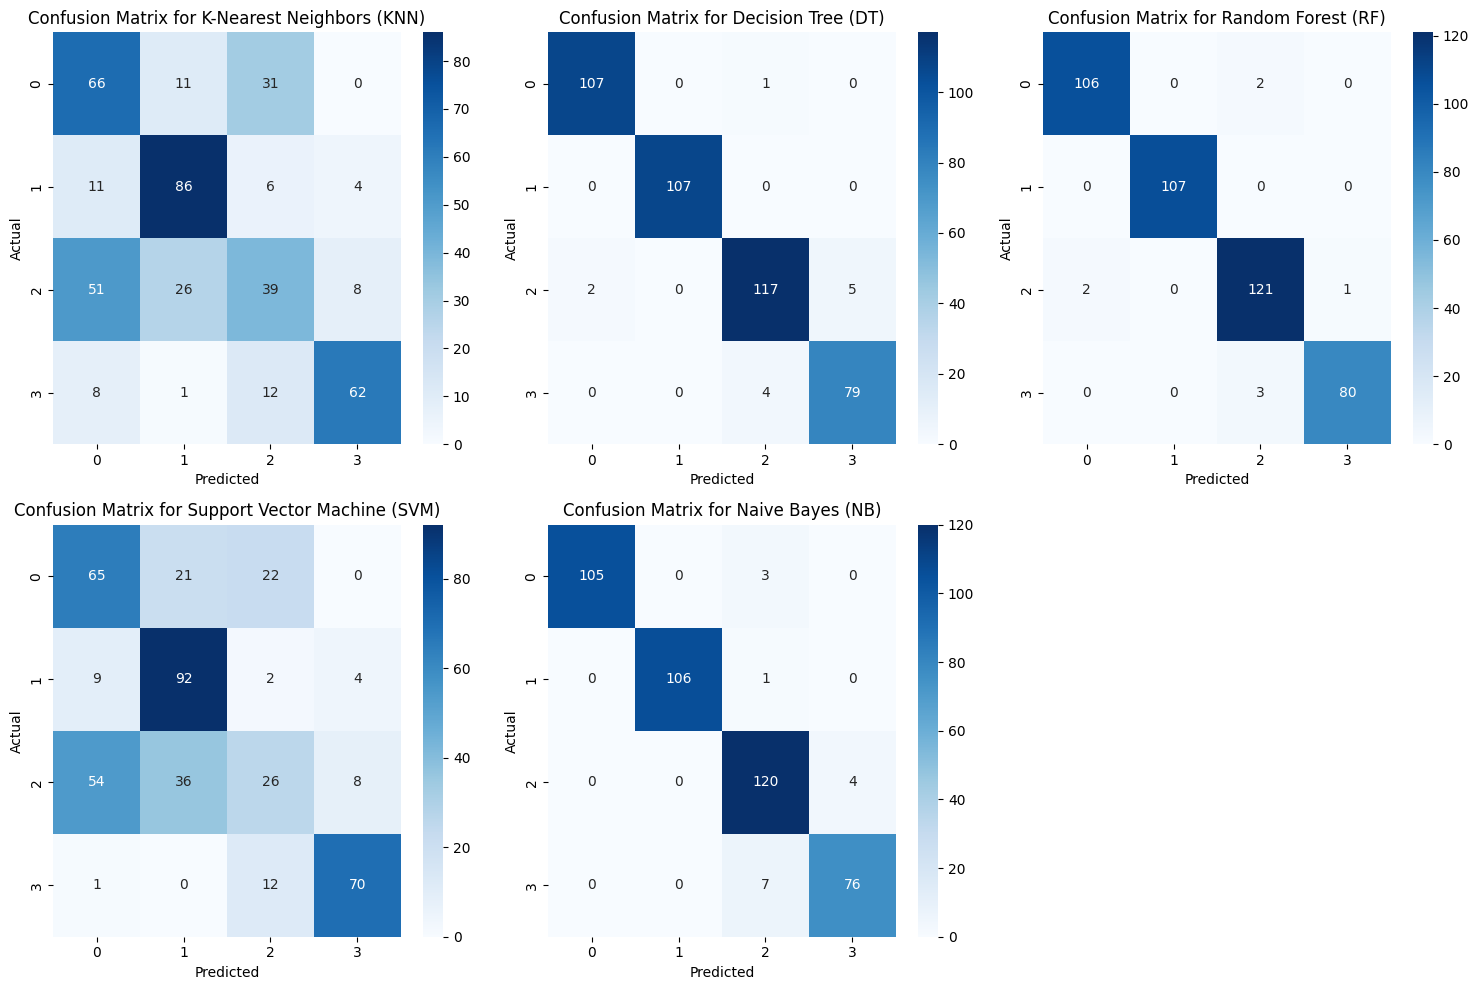

In [158]:
# menampilkan confusion matrix untuk berbagai model dalam satu plot
plt.figure(figsize=(15, 10))

# confusion matrix untuk KNN
plt.subplot(2, 3, 1)
sns.heatmap(results['K-Nearest Neighbors (KNN)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# confusion matrix untuk Decision Tree
plt.subplot(2, 3, 2)
sns.heatmap(results['Decision Tree (DT)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree (DT)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# confusion matrix untuk Random Forest
plt.subplot(2, 3, 3)
sns.heatmap(results['Random Forest (RF)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (RF)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# confusion matrix untuk SVM
plt.subplot(2, 3, 4)
sns.heatmap(results['Support Vector Machine (SVM)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Support Vector Machine (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# confusion matrix untuk Naive Bayes
plt.subplot(2, 3, 5)
sns.heatmap(results['Naive Bayes (NB)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes (NB)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# menampilkan seluruh plot sekaligus
plt.tight_layout()  # untuk memastikan tidak ada label yang terpotong
plt.show()

In [159]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
import joblib
joblib.dump(knn, 'explore_knn_classification.h5')
joblib.dump(rf, 'explore_random_forest_classification.h5')
joblib.dump(svm, 'explore_svm_classification.h5')
joblib.dump(nb, 'explore_naive_bayes_classification.h5')

['explore_naive_bayes_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [160]:
# Lakukan Hyperparameter Tuning dan Latih ulang. (random forest)
from sklearn.model_selection import GridSearchCV
# Tentukan parameter yang akan di-tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Inisialisasi Random Forest Classifier
rf_tuned = RandomForestClassifier(random_state=42)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, 
                            scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# Melakukan hyperparameter tuning
grid_search.fit(X_train, y_train)
# Menampilkan hasil terbaik dari GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
# Melatih ulang model dengan parameter terbaik
best_rf_model = grid_search.best_estimator_

# Evaluasi model terbaik
best_rf_results = evaluate_model(best_rf_model, X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


Best Random Forest Model Evaluation:
Accuracy: 0.9858
Precision: 0.9871
Recall: 0.9843
F1-Score: 0.9856


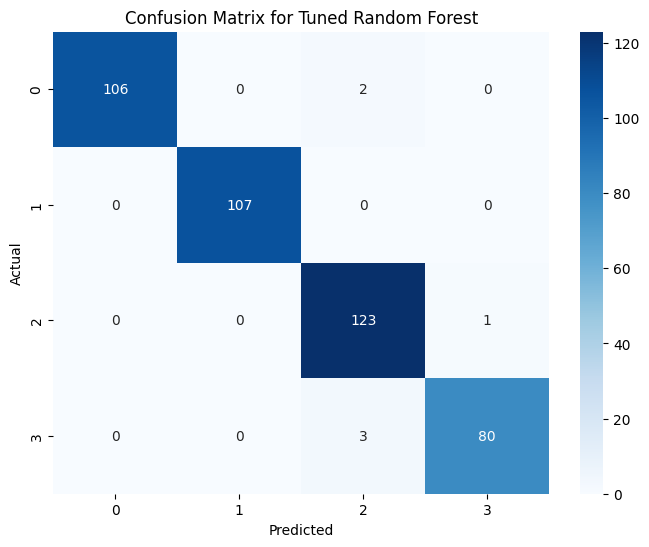

In [161]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
print("Best Random Forest Model Evaluation:")
print(f"Accuracy: {best_rf_results['Accuracy']:.4f}")
print(f"Precision: {best_rf_results['Precision']:.4f}")
print(f"Recall: {best_rf_results['Recall']:.4f}")
print(f"F1-Score: {best_rf_results['F1-Score']:.4f}")

# menampilkan confusion matrix untuk model Random Forest yang sudah dituning
plt.figure(figsize=(8, 6))
sns.heatmap(best_rf_results['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [162]:
# Menyimpan Model hasil tuning
import joblib
joblib.dump(best_rf_model, 'tuning_classification.h5')

['tuning_classification.h5']